# Introduction

IBM Qiskit

> A software stack for quantum computing

https://www.ibm.com/quantum/qiskit

What can Qiskit do?

Nothing!

But, we can use Qiskit to:

* Write quantum-computing program

* Run it either on simulator or on a real quantum computing machine

# Get started

First, we need qiskit.

Install it!

https://docs.quantum.ibm.com/guides/install-qiskit

## Install qiskit

In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=55da0941aca6983ccc973ce26fa9a2daa83187a3b3ddc01c7ad2a2d03a60786b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


~ 10s

In [ ]:
import qiskit

qiskit.__version__

'1.2.0'

## Run a QC program

We can run a QC program either

* on a simulator, e.g., Aer simulation

* on a real QC.

Here, we explore how to run it using Aer (read 'air') simulator.

See [Run on real QC](https://monet.en.kku.ac.th/courses/EN813711/QC/RunQCv1_Blind.ipynb) for how to run on a real quantum computer.

### Install Aer simulator


https://qiskit.github.io/qiskit-aer/getting_started.html

In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.1 MB/s eta 0:00:00


In [ ]:
import qiskit_aer

qiskit_aer.__version__

'0.15.0'

#### Test the installed

In [ ]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

##### Qiskit patterns

IBM recommended patterns for writing a quantum program:

> 1. Map the problem to a quantum-native format.
>
> 2. Optimize the circuits and operators.
>
> 3. Execute using a quantum primitive function.
>
> 4. Analyze the results.

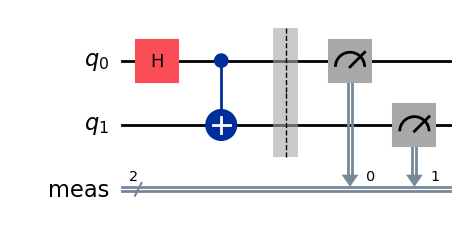

In [ ]:
# 1. Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

circ.draw('mpl')

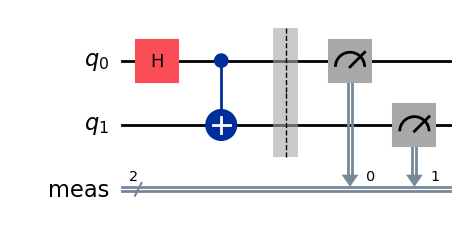

In [ ]:
# 2. Transpile for simulator: optimize it to the real hardware
simulator = AerSimulator()
circ = transpile(circ, simulator)

circ.draw('mpl')

Since this is a simulator, it does not have to optimize anything.

In [ ]:
# 3. Run
job = simulator.run(circ)


{'11': 510, '00': 514}


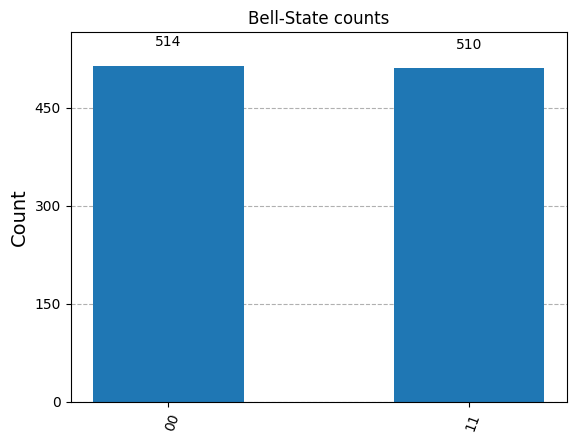

In [ ]:
# 4. Read the result
result = job.result()

counts = result.get_counts(circ)

print(counts)
plot_histogram(counts, title='Bell-State counts')

# Quantum search

2024 Sep 10th


Try Glover based on
[Grovers Algorithm — Programming on Quantum Computers — Coding with Qiskit S2E3](https://www.youtube.com/watch?v=0RPFWZj7Jm0)

This notebook is adapted based on Lab 3 of Introduction to Quantum Computing 2 (U Chicago on EdX)

## The problem: unstructured search

Check out qiskit document:

https://docs.quantum.ibm.com/api/qiskit/release-notes/1.2

In [ ]:
my_list = [1, 3, 5, 2, 4, 9, 5, 8, 0, 7, 6]

In [ ]:
# This is a kind of a black box.

def the_oracle(my_input):
  winner = 7
  if my_input is winner:
    response = True
  else:
    response = False

  return response

In [ ]:
# Classical search

for index, trial_number in enumerate(my_list):
  if the_oracle(trial_number) is True:
    print('Winner is found @ %d'%index)
    print(f'* It is {my_list[index]}.')
    print('We spent %d calls to the oracle for %d items.'%(index + 1, len(my_list)))
    break

Winner is found @ 9
* It is 7.
We spent 10 calls to the oracle for 11 items.


The number of calls may be vary depending on where the answer is.
On average we will spend around $n/2$ times.

In the worst case, we will spend $n$ times.

Anyhow, it is $O(n)$ for the classical.

## Grover

Suppose we have 2 qubits and the answer is ```11```,
the output from the oracle is ```-11``` for input ```11```
otherwise the output is the same as its input.

To implement this oracle,
we need a controlled-Z gate:

$$|11\rangle \rightarrow [CZ] \rightarrow -|11\rangle$$

We also need

* Amplitude amplification.
  * Grover's diffusion operator
    

In [ ]:
# Grover

from qiskit import *
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Define the oracle.
# Let's do 2 qubits.

oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate() # Make a gate named 'oracle'
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

### Check the oracle

Test if the oracle works as expected.

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

#### Run it on AerSimulator

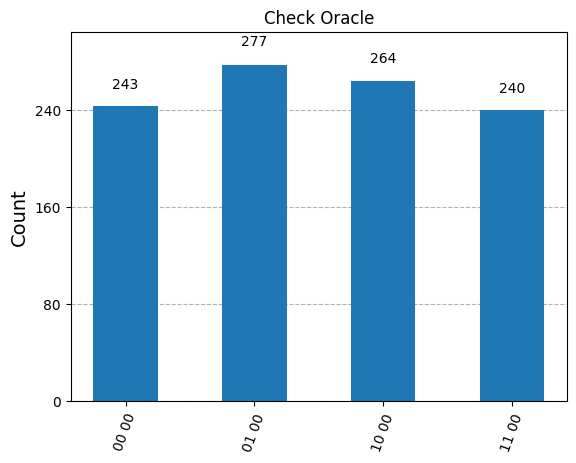

In [ ]:
# Configure backend
from qiskit_aer import AerSimulator

grover_circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
grover_circ = transpile(grover_circ, simulator)

# Run and get counts
result = simulator.run(grover_circ).result()
counts = result.get_counts(grover_circ)
plot_histogram(counts, title='Check Oracle')

We need to check the state vector, otherwise we cannot see the phase flip (negative sign).

In [ ]:
import qiskit_aer

In [ ]:
dir(qiskit_aer)[:10]

['Aer',
 'AerError',
 'AerJob',
 'AerProvider',
 'AerSimulator',
 'QasmSimulator',
 'StatevectorSimulator',
 'UnitarySimulator',
 '__builtins__',
 '__cached__']

In [ ]:
from qiskit_aer import StatevectorSimulator

grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])

# Transpile for simulator
simulator = StatevectorSimulator()
grover_circ = transpile(grover_circ, simulator)

# Run and get counts
result = simulator.run(grover_circ).result()


# Get state vectors
sv = result.get_statevector()

np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

Yes! The last state (```11```) has its sign flip.

That is

$$| \psi \rangle = 0.5|00\rangle + 0.5|01\rangle + 0.5|10\rangle - 0.5|11\rangle . $$

Good!

But, we cannot measure this $-0.5$ of _probability amplitude_.

The probability or more specifically count in our measurement cannot see this negative sign!

The count will correspond to probability, which is a square of the magnitude of _probability amplitude_.

I.e.,

* Pr['00'] = $|0.5|^2$ = 0.25
* Pr['01'] = $|0.5|^2$ = 0.25
* Pr['10'] = $|0.5|^2$ = 0.25
* Pr['11'] = $|-0.5|^2$ = 0.25

Note $|a + jb|^2 = (a + j b)(a - jb) = a^2 + b^2$



More precisely,
probability of state $| x \rangle$,

$$P[x] = \langle x | c^\ast c | x \rangle = | c |^2$$

Hence, we need reflection operation to selectively "amplify" the amplitude of the answer.

### Reflection

Reflection operator is to apply a negative phase to every state orthogonal to our input state.

In [ ]:
# Reflection
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1]) # To bring back our original |00> state
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1]) # Transform it back
reflection.to_gate()

reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

### Put them all together

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1], [0,1])

grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

#### Try it with AerSimulator

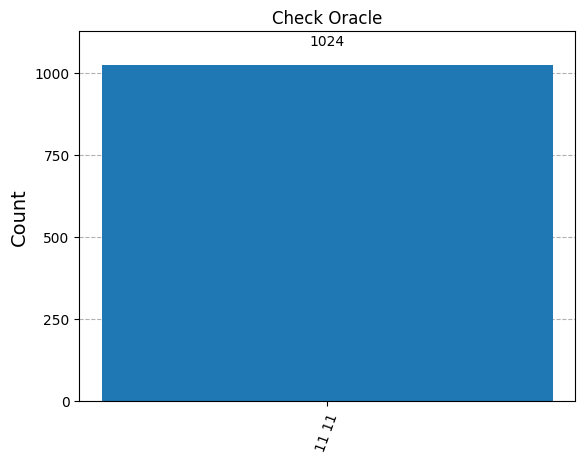

In [ ]:
# Configure backend
from qiskit_aer import AerSimulator

grover_circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
grover_circ = transpile(grover_circ, simulator)

# Run and get counts
result = simulator.run(grover_circ).result()
counts = result.get_counts(grover_circ)
plot_histogram(counts, title='Check Oracle')

# Try Grover again with different answer

We will use simulator for simplicity.

## Set the oracle

In [ ]:
from qiskit import *

# Make the oracle
oracle = QuantumCircuit(2, name='oracle')

# 00
# oracle.x(0)
# oracle.x(1)
# oracle.cz(0,1)
# oracle.x(0)
# oracle.x(1)

# 01
oracle.x(1)
oracle.cz(0,1)
oracle.x(1)

# 10
# oracle.x(0)
# oracle.cz(0,1)
# oracle.x(0)

# 11
# oracle.cz(0,1)

oracle.to_gate() # Make a gate named 'oracle'


Instruction(name='oracle', num_qubits=2, num_clbits=0, params=[])

## Test the oracle

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])
grover_circ.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [ ]:
from qiskit_aer import StatevectorSimulator

grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle,[0,1])

# Transpile for simulator
simulator = StatevectorSimulator()
grover_circ = transpile(grover_circ, simulator)

# Run and get counts
result = simulator.run(grover_circ).result()


# Get state vectors
sv = result.get_statevector()

np.around(sv, 2)

array([ 0.5+0.j, -0.5+0.j,  0.5+0.j,  0.5+0.j])

## Make reflection operator

In [ ]:
# Reflection
reflection = QuantumCircuit(2, name='reflection')
reflection.h([0,1]) # To bring back our original |00> state
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1]) # Transform it back
reflection.to_gate()


Instruction(name='reflection', num_qubits=2, num_clbits=0, params=[])

## Map Grover search

In [ ]:
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1], [0,1])

grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

## Execute

In [ ]:
# Configure backend
from qiskit_aer import AerSimulator

grover_circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
grover_circ = transpile(grover_circ, simulator)

# Run
result = simulator.run(grover_circ).result()

## Get result

{'01 01': 1024}


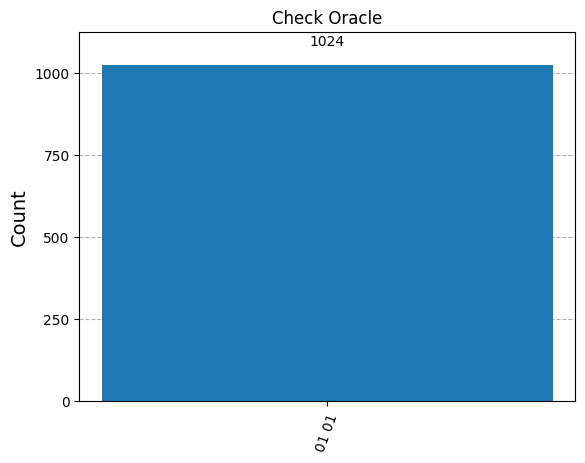

In [ ]:
counts = result.get_counts(grover_circ)
print(counts)
plot_histogram(counts, title='Check Oracle')

# Grover search algorithm